In [2]:
!nvidia-smi 2>&1 | grep -i "cuda"
!nvidia-smi

| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
Mon Sep 30 14:05:20 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   33C    P8               9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |  

In [3]:
import os
HOME = os.getcwd()
print(HOME)

/content


Installing YOLO V8 Model



In [4]:
!pip install albumentations==1.4

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 123.6/123.6 kB 6.2 MB/s eta 0:00:00
  Attempting uninstall: albumentations
    Found existing installation: albumentations 1.4.15
    Uninstalling albumentations-1.4.15:
      Successfully uninstalled albumentations-1.4.15


In [5]:
# Pip install method (recommended)
!pip install ultralytics

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics 8.3.0 🚀 Python-3.10.12 torch-2.4.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 36.5/112.6 GB disk)


In [ ]:
# Git clone method (for development)

# %cd {HOME}
# !git clone github.com/ultralytics/ultralytics
# %cd {HOME}/ultralytics
# !pip install -e .

# from IPython import display
# display.clear_output()

# import ultralytics
# ultralytics.checks()

In [6]:
from ultralytics import YOLO

from IPython.display import display, Image

In [8]:
ROOT = "/content/drive/MyDrive/Dental Anatomy"

In [9]:
!pwd

/content


In [10]:
%cd "/content/drive/MyDrive/Dental Anatomy"

/content/drive/MyDrive/Dental Anatomy


In [11]:
!pwd

/content/drive/MyDrive/Dental Anatomy


In [12]:
!ls

dataset  data.yaml


In [13]:
!yolo task=detect mode=train model=yolov8x.pt data=data.yaml epochs=50 imgsz=640 save=true

100% 131M/131M [00:00<00:00, 191MB/s]
Ultralytics 8.3.0 🚀 Python-3.10.12 torch-2.4.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8x.pt, data=data.yaml, epochs=50, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_c

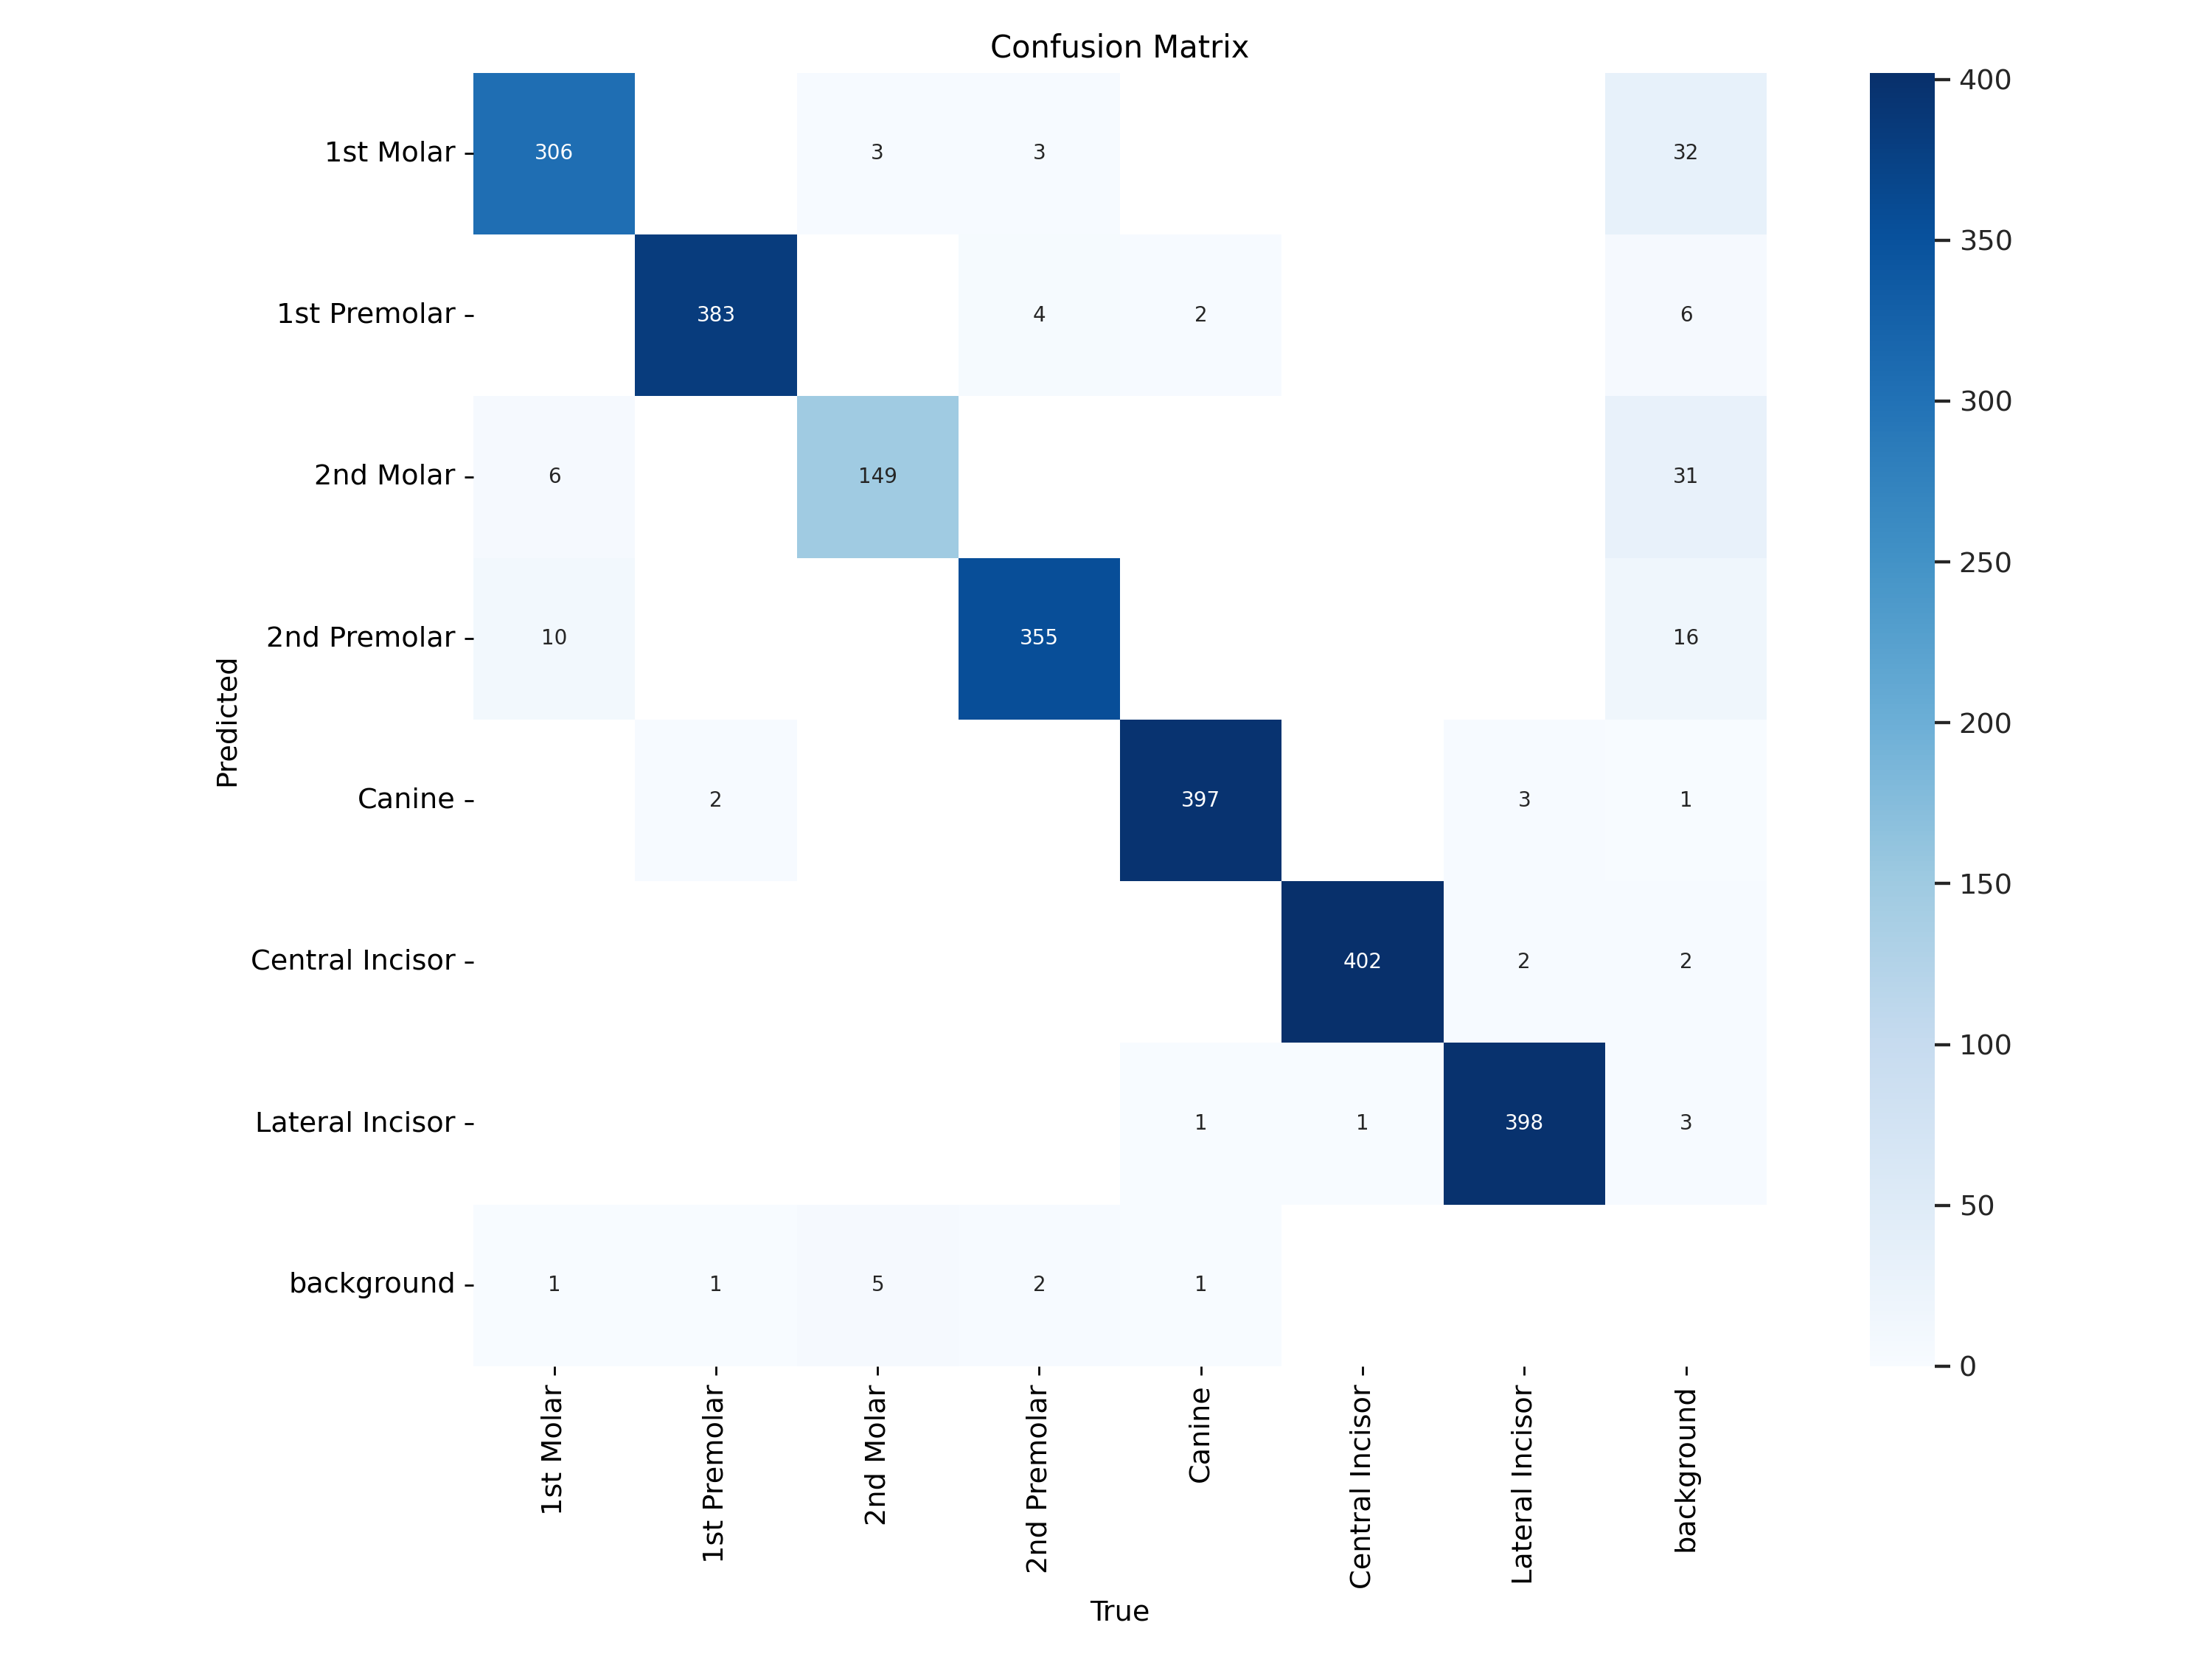

In [14]:
Image(filename=f'runs/detect/train/confusion_matrix.png', width=700)

In [15]:
!yolo task=detect mode=val model=runs/detect/train/weights/best.pt data=data.yaml

Ultralytics 8.3.0 🚀 Python-3.10.12 torch-2.4.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 286 layers, 61,602,309 parameters, 0 gradients, 226.7 GFLOPs
val: Scanning /content/drive/MyDrive/Dental Anatomy/dataset/valid/labels.cache... 112 images, 0 backgrounds, 0 corrupt: 100% 112/112 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 7/7 [00:09<00:00,  1.33s/it]
                   all        112       2437      0.964      0.967      0.982      0.783
             1st Molar        106        323      0.936      0.935      0.966      0.676
          1st Premolar        111        386      0.974       0.99      0.991      0.804
             2nd Molar         74        157      0.904      0.898      0.951      0.628
          2nd Premolar        109        364      0.962      0.966      0.986      0.738
                Canine        112        401      0.986       0.99      0.991      0.855
       Central Incisor     

In [16]:
!yolo task=detect mode=predict model=runs/detect/train/weights/best.pt conf=0.25 source=dataset/test/images save=true

Ultralytics 8.3.0 🚀 Python-3.10.12 torch-2.4.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 286 layers, 61,602,309 parameters, 0 gradients, 226.7 GFLOPs

image 1/107 /content/drive/MyDrive/Dental Anatomy/dataset/test/images/Fig100_SAU_JPG.rf.79b3fc155a06f078d19333b496071469.jpg: 352x640 3 1st Molars, 4 1st Premolars, 1 2nd Molar, 4 2nd Premolars, 4 Canines, 4 Central Incisors, 4 Lateral Incisors, 61.8ms
image 2/107 /content/drive/MyDrive/Dental Anatomy/dataset/test/images/Fig105_MYS_JPG.rf.6cfdf193fc8c49102807258ffabe0969.jpg: 320x640 4 1st Molars, 4 1st Premolars, 2 2nd Molars, 4 2nd Premolars, 4 Canines, 4 Central Incisors, 4 Lateral Incisors, 103.7ms
image 3/107 /content/drive/MyDrive/Dental Anatomy/dataset/test/images/Fig105_SAU_JPG.rf.ffabf11509d576acc8a655d6889749ad.jpg: 352x640 3 1st Premolars, 1 2nd Premolar, 4 Canines, 4 Central Incisors, 4 Lateral Incisors, 58.8ms
image 4/107 /content/drive/MyDrive/Dental Anatomy/dataset/test/images/Fig106_SAU_JPG.rf.90850296b125c

In [ ]:
from google.colab import drive
drive.mount('/content/drive')